## NIDDK Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load the dataset

In [5]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"
df = pd.read_csv(filename, header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Statistical Overview of dataset

In [7]:
print('\033[1mThe Shape of the Dataframe:\033[0m', df.shape,"-"*60, sep = "\n")
print("\033[1mDataframe Information:\033[0m")
df.info()

The Shape of the Dataframe:
(768, 9)
------------------------------------------------------------
Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df_mean = df.describe().loc['mean']
df_describe = df.describe()
print(df_mean, "\n\n")
df_describe

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Name: mean, dtype: float64 




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
missing_data = df.isnull()
missing_values_counts = {}

for values in missing_data.columns.values.tolist():
     # print(missing_data[values].value_counts())
    missing_values_counts[values] = missing_data[values].value_counts()

missing_values_df = pd.DataFrame(missing_values_counts).T
missing_values_df

,False
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


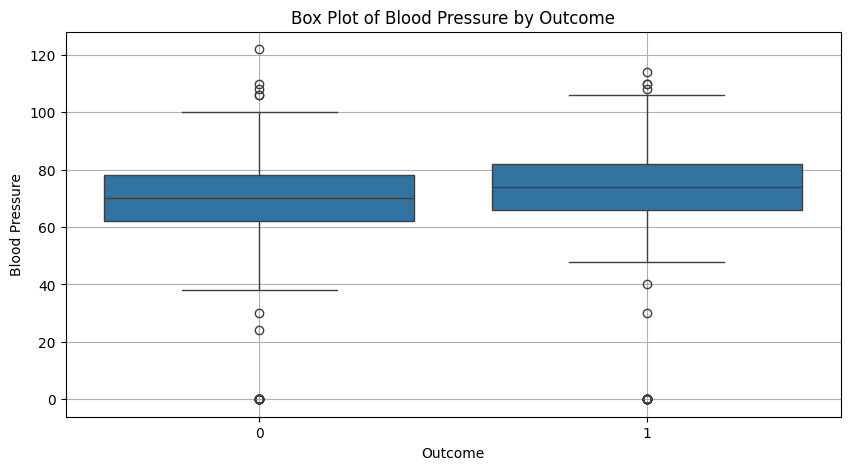

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Box Plot of Blood Pressure by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Blood Pressure')
plt.grid(True)
plt.show()

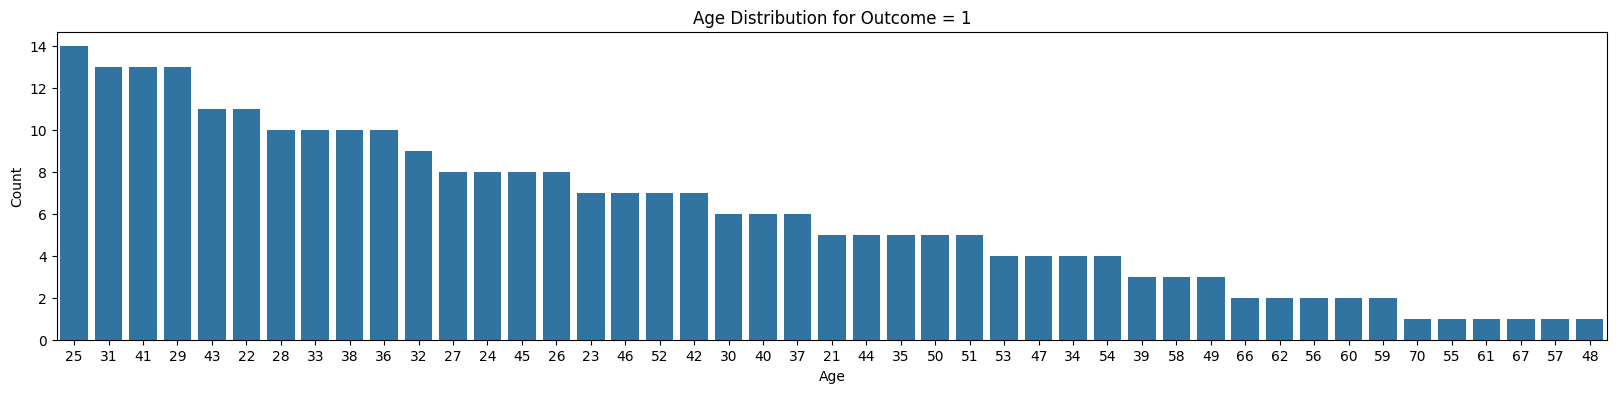

In [69]:
filtered_df = df[df['Outcome'] == 1]

plt.figure(figsize=(20, 4))
sns.countplot(x='Age', data=filtered_df, order=filtered_df['Age'].value_counts().index)
plt.title('Age Distribution for Outcome = 1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

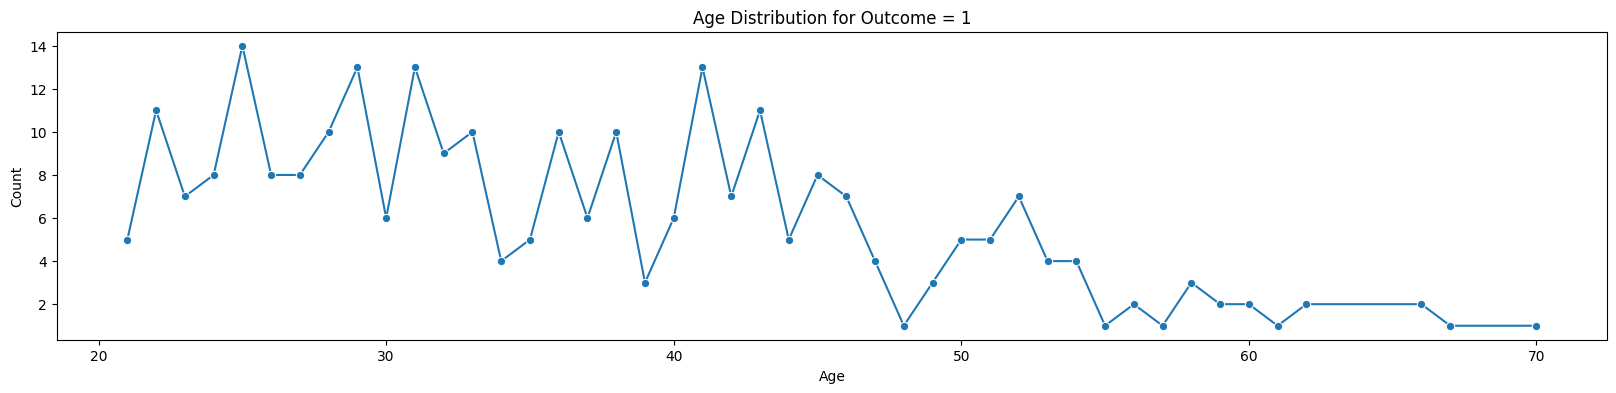

In [71]:
age_counts = filtered_df['Age'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
sns.lineplot(x=age_counts.index, y=age_counts.values, marker='o')
plt.title('Age Distribution for Outcome = 1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

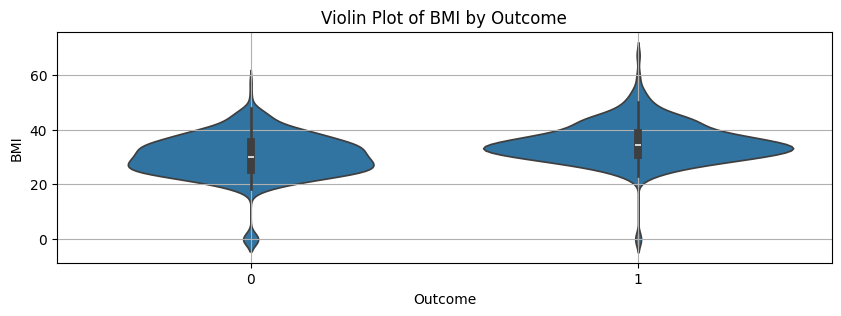

In [43]:
plt.figure(figsize=(10, 3))
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title(f'Violin Plot of {"BMI"} by Outcome')
plt.xlabel('Outcome')
plt.ylabel("BMI")
plt.grid(True)
plt.show()

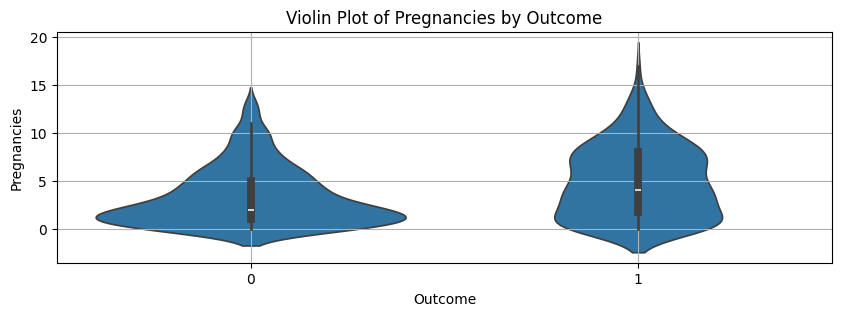

In [45]:
plt.figure(figsize=(10, 3))
sns.violinplot(x='Outcome', y='Pregnancies', data=df)
plt.title(f'Violin Plot of {"Pregnancies"} by Outcome')
plt.xlabel('Outcome')
plt.ylabel("Pregnancies")
plt.grid(True)
plt.show()

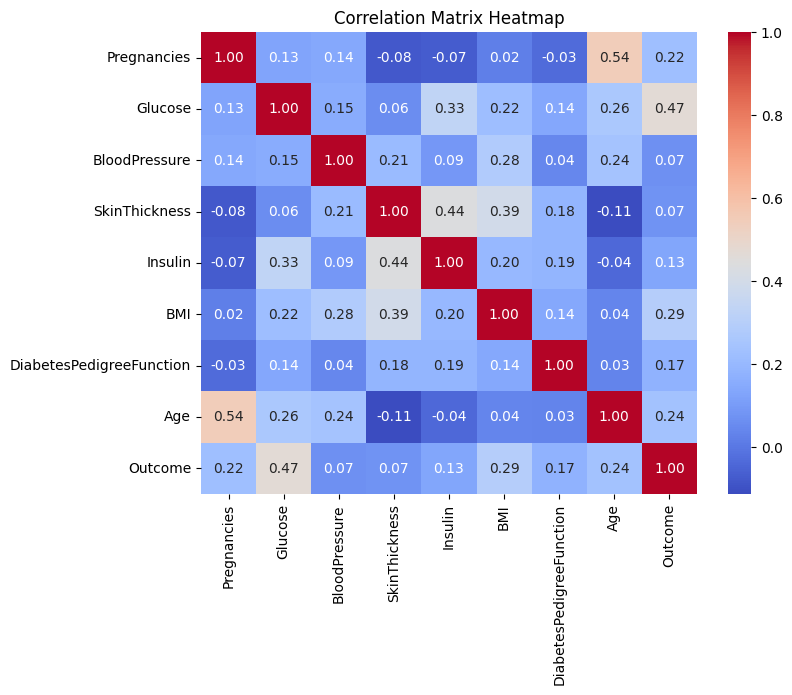

In [51]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

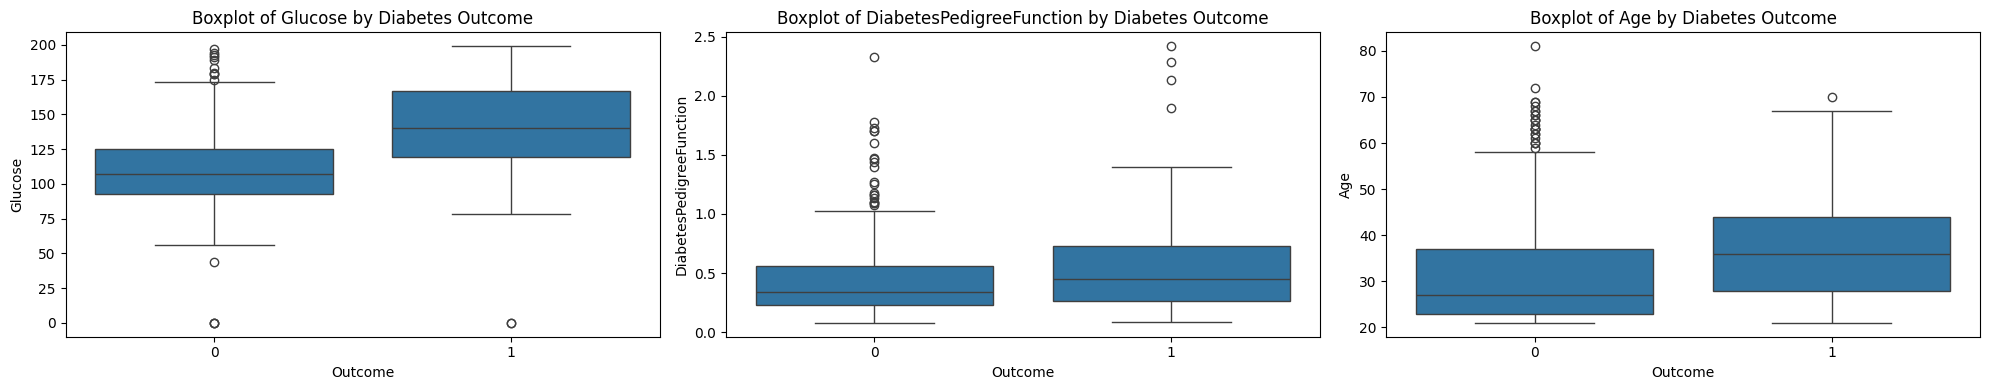

In [31]:
features = ["Glucose", "DiabetesPedigreeFunction", "Age"]

plt.figure(figsize=(20, 4))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"Boxplot of {col} by Diabetes Outcome")
plt.tight_layout()
plt.show()

In [62]:
for i in df.columns.values.tolist():
    c, p = stats.pearsonr(df[i], df["Outcome"])
    print(f"{i}\nCoef: {c}\nP-value: {p}\n")

Pregnancies
Coef: 0.22189815303398674
P-value: 5.065127298053635e-10

Glucose
Coef: 0.46658139830687406
P-value: 8.935431645289576e-43

BloodPressure
Coef: 0.06506835955033283
P-value: 0.07151390009776264

SkinThickness
Coef: 0.0747522319183194
P-value: 0.038347704820490915

Insulin
Coef: 0.13054795488404772
P-value: 0.0002861864603603164

BMI
Coef: 0.2926946626444455
P-value: 1.2298074873116917e-16

DiabetesPedigreeFunction
Coef: 0.1738440656529601
P-value: 1.2546070101487771e-06

Age
Coef: 0.2383559830271977
P-value: 2.209975460665451e-11

Outcome
Coef: 1.0
P-value: 0.0



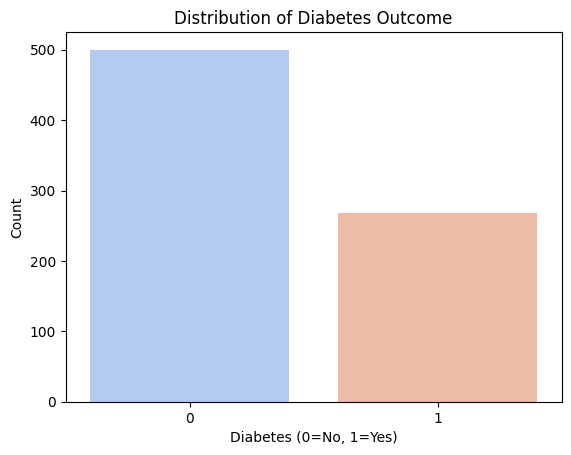

In [33]:
sns.countplot(x="Outcome", data=df, palette="coolwarm")
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

## Modelling

In [57]:
lr = LinearRegression()
x_data = df.drop(["Outcome"], axis=1)
y_data = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=0)

lr.fit(x_train, y_train)
yhat = lr.predict(x_test)
r2_score(y_test, yhat), mean_squared_error(y_test, yhat)

(0.328024496438303, 0.14801838529703254)

[0.32802449643830267, 0.30027783297838584, -0.45734521722277366]


Text(0, 0.5, 'R^2')

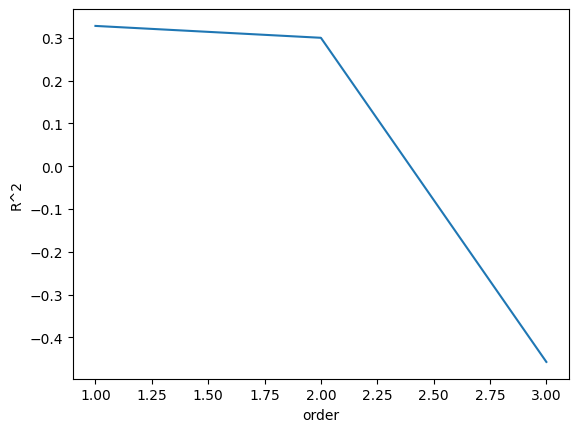

In [59]:
order = [1, 2, 3]
r2 = []

for i in order:
    pr = PolynomialFeatures(degree=i)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lr.fit(x_train_pr, y_train)
    x = lr.score(x_test_pr, y_test)
    r2.append(x)

print(r2)
sns.lineplot(x=order, y=r2)
plt.xlabel('order')
plt.ylabel('R^2')

In [79]:
Input=[("scale",StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False, degree=2)), ("model", LinearRegression())]
pipe= Pipeline(Input)
x_train = x_train.astype("float64")
pipe.fit(x_train, y_train)
Yhat_pipe = pipe.predict(x_test)
pipe.score(x_train, y_train), pipe.score(x_test, y_test), mean_squared_error(y_test, Yhat_pipe)

(0.36370450704791113, 0.31349054852430813, 0.15711573885691849)

In [82]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [88]:
alpha = np.arange(0.001, 10, 0.01)
r2_train, r2_test = [], []
bar = tqdm(alpha) #array of alpha

for i in bar:
    RR = Ridge(alpha=i)
    RR.fit(x_train_pr, y_train)
    
    test_score = RR.score(x_test_pr, y_test)
    train_score = RR.score(x_train_pr, y_train)
    r2_train.append(train_score)
    r2_test.append(test_score)

    bar.set_postfix({"Test Score": test_score, "Train Score": train_score, "Alpha": i})
    if test_score == max(r2_test):
        x = i
        test_r2 = test_score
print(x, test_r2)

100%|██████████| 1000/1000 [00:04<00:00, 225.84it/s, Test Score=0.303, Train Score=0.36, Alpha=9.99]

0.001 0.31348419947143513


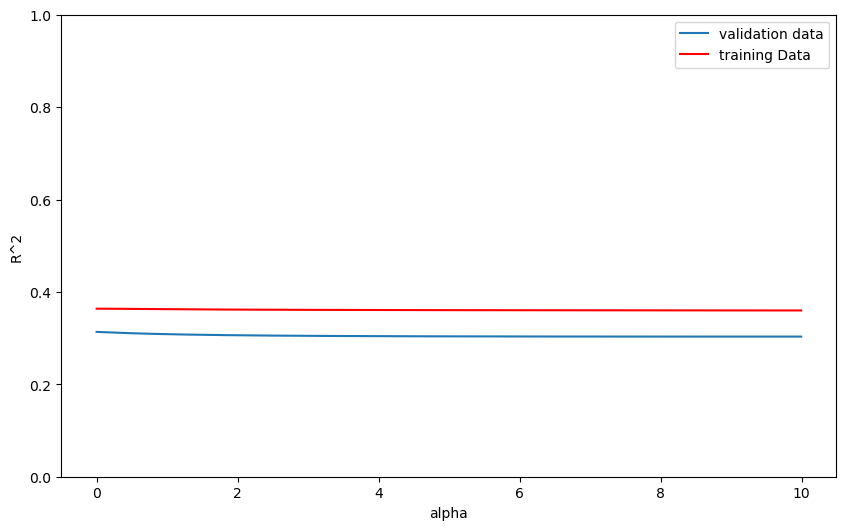

In [91]:
plt.figure(figsize=(10, 6))  
plt.plot(alpha, r2_test, label='validation data')
plt.plot(alpha, r2_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()